# Using several classifiers and tuning parameters - Parameters grid
[From official `scikit-learn` documentation](http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)

Adapted by Claudio Sartori

Example of usage of the ***model selection*** features of `scikit-learn` and comparison of several classification methods.
1. import a sample dataset 
1. split the dataset into two parts: train and test
    - the *train* part will be used for training and validation (i.e. for *development*)
    - the *test* part will be used for test (i.e. for *evaluation*)
    - the fraction of test data will be _ts_ (a value of your choice between 0.2 and 0.5)
1. [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) performs multiple cross-validation experiments to train and test a model with different combinations of parameter values
    - for each parameter we set a list of values to test, the `fit` method will generate every possible combination, fit a model with it and evaluate its performance
    - we choose a *score function* which will be used for the optimization
        - e.g. `accuracy_score`, `precision_score`, `cohen_kappa_score`, `f1_score`, see [this](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) and [this](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for reference
    - the output is a dictionary that contains 
        - the set of parameters which maximize the score 
        - the test scores
1. prepare the parameters for the grid
    - it is a list of dictionaries
1. set the parameters by cross validation and the *score functions* to choose from
1. Loop on scores and, for each score, loop on the model labels (see details below)

### Prepare the environment
The `dataset` module contains, among others, a few sample datasets.

See this [page](http://scikit-learn.org/stable/datasets/index.html) for reference

In the following:
- Load a dataset using the `dataset` module  (output refers to the wine dataset)
- Prepare the data and the target in X and y. 

In [2]:
X = dataset.data
y = dataset.target
print("{:7} examples -- {} features -- {} classes"\
      .format(X.shape[0],X.shape[1], np.unique(y).shape[0]))

    150 examples -- 4 features -- 3 classes


In [3]:
import pandas as pd
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Train-test split:
- Set the test set size `ts`. 
- Set the random state to 44.
- Split the dataset into the train and test parts

In [4]:
ts = 0.3
random_state = 44

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=ts, random_state=random_state)
print("Training on %d examples" % len(X_train))

Training on 105 examples


### Try GridSearchCV with a DecisionTreeClassifier
Use `GridSearchCV` to get the best `max_depth` value for a `DecisionTreeClassifier` evaluating accuracy:
- Define the parameters to be tested and the range of values for each one
- Get a `GridSearchCV` instance for a `DecisionTreeClassifier`
- Fit the instance to the training data

**It's ok to get results that are different than the output**

In [5]:
dt_params = [{'max_depth': range(1, 20)}]
clf = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid=dt_params, 
                   scoring='accuracy', cv=5,
                   return_train_score = False,
                   n_jobs = 2)
clf.fit(X_train, y_train)

print("Best parameters: {}".format(clf.best_params_))

Best parameters: {'max_depth': 6}


In [1]:
"""
http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
@author: scikit-learn.org and Claudio Sartori
"""
import warnings
warnings.filterwarnings('ignore') # uncomment this line to suppress warnings

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
print(__doc__) # print information included in the triple quotes at the beginning

# Loading a standard dataset
#dataset = datasets.load_digits()
# dataset = datasets.fetch_olivetti_faces() # 40 classes!
# dataset = datasets.fetch_covtype()        # 581012 examples	 54 features 
dataset = datasets.load_iris()    # 150 examples -- 4 features -- 3 classes
# dataset = datasets.load_wine()      # 178 examples -- 13 features -- 3 classes
# dataset = datasets.load_breast_cancer() # binary


http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
@author: scikit-learn.org and Claudio Sartori



### The function below groups all the outputs
Write a `print_results` function that takes a fitted model and uses its attributes to inspect the results of the search with the parameter grid.

The attributes are:<br>
`model.best_params_`<br>
`model.cv_results_['mean_test_score']`<br>`
model.cv_results_['std_test_score']`<br>
`model.cv_results_['params']`

The report is generated by the `classification_report` function imported from `sklearn.metrics`, which takes as argument the true test labels and the predicted test labels.

The +/- in the results is obtained doubling the `std_test_score`. Mean and standard test scores are computed considering the various results on the cross-validation chunks.

The function will be used to print the results for each set of parameters in the last part of the exercise.

Use `print_results` to show the result of the tuning above.

In [6]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

print_results(clf)

Best parameters set found on train set:

{'max_depth': 6}

Grid scores on train set:

0.667 (+/-0.000) for {'max_depth': 1}
0.924 (+/-0.076) for {'max_depth': 2}
0.905 (+/-0.085) for {'max_depth': 3}
0.924 (+/-0.047) for {'max_depth': 4}
0.924 (+/-0.047) for {'max_depth': 5}
0.952 (+/-0.060) for {'max_depth': 6}
0.943 (+/-0.071) for {'max_depth': 7}
0.952 (+/-0.060) for {'max_depth': 8}
0.914 (+/-0.038) for {'max_depth': 9}
0.933 (+/-0.047) for {'max_depth': 10}
0.933 (+/-0.047) for {'max_depth': 11}
0.933 (+/-0.047) for {'max_depth': 12}
0.933 (+/-0.047) for {'max_depth': 13}
0.952 (+/-0.060) for {'max_depth': 14}
0.924 (+/-0.047) for {'max_depth': 15}
0.933 (+/-0.047) for {'max_depth': 16}
0.943 (+/-0.071) for {'max_depth': 17}
0.952 (+/-0.060) for {'max_depth': 18}
0.952 (+/-0.060) for {'max_depth': 19}

Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    rec

### Loop on scores and, for each score, loop on the model labels
- iterate varying the score function
    1. iterate varying the classification model among Decision Tree, Naive Bayes, Linear Perceptron, Support Vector
        - activate the *grid search*
            1. the resulting model will be the best one according to the current score function
        - print the best parameter set and the results for each set of parameters using the above defined function
        - print the classification report
        - store the `.best score_` in a dictionary for a final report
    1. print the final report for the current *score funtion*

In [7]:
# The code below is intended to ease the remainder of the exercise

model_lbls = [
             # 'dt', 
             # 'nb', 
#              'lp', 
             'svc', 
             # 'knn',
            ]

# Set the parameters to be explored by the grid for each classifier
tuned_param_dt = [{'max_depth': list(range(1,20))}]
tuned_param_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]
tuned_param_lp = [{'early_stopping': [True]}]
tuned_param_svc = [{'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100, 1000],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100, 1000],                     
                    },
                   ]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# set the models to be fitted specifying name, estimator and parameter structure
models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': tuned_param_nb
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(), 
           'param': tuned_param_svc
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
        
    }
}

# scores to be explored
scores = [
          'precision', 
#           'recall',
         ]

In [8]:
results_short = {}

for score in scores:
    print('='*40)
    print("# Tuning hyper-parameters for %s" % score)
    print()

    #'%s_macro' % score ## is a string formatting expression
    # the parameter after % is substituted in the string placeholder %s
    for m in model_lbls:
        print('-'*40)
        print("Trying model {}".format(models[m]['name']))
        clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                           scoring='%s_macro' % score, 
#                            iid = False, 
                           return_train_score = False,
                           n_jobs = 2, # this allows using multi-cores
                           )
        clf.fit(X_train, y_train)
        print_results(clf)
        results_short[m] = clf.best_score_
    print("Summary of results for {}".format(score))
    print("Estimator")
    for m in results_short.keys():
        print("{}\t - score: {:5.2f}%".format(models[m]['name'], results_short[m]*100))

# Tuning hyper-parameters for precision

----------------------------------------
Trying model Support Vector      
Best parameters set found on train set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on train set:

0.117 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.117 (+/-0.016) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.933 (+/-0.072) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.117 (+/-0.016) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.955 (+/-0.055) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.933 (+/-0.072) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.950 (+/-0.065) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.955 (+/-0.055) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.950 (+/-0.065) for {'C': 1, 'kernel': 'linear'}
0.942 (+/-0.046) for {'C': 10, 'kernel': 'linear'}
0.942 (+/-0.046) for {'C': 100, 'kernel': 'linear'}
0.948 (+/-0.092) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report for the best 

/Users/csartori/opt/anaconda3/envs/sklearn1.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/csartori/opt/anaconda3/envs/sklearn1.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/csartori/opt/anaconda3/envs/sklearn1.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

In [9]:
results_short

{'svc': 0.9546296296296296}

In [14]:
clf.best_estimator_.support_vectors_.shape

(39, 4)

<AxesSubplot:xlabel='2', ylabel='3'>

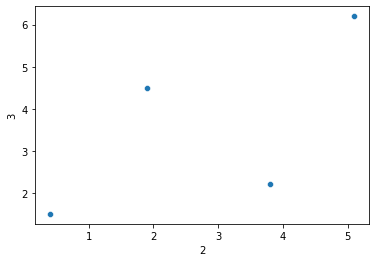

In [16]:
import seaborn as sns
sns.scatterplot(data = clf.best_estimator_.support_vectors_, x = 2, y = 3 )